In [ ]:
!pip install -q --upgrade keras-cv
#!pip install -q --upgrade keras  # Upgrade to Keras 3.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.9 MB/s eta 0:00:00


In [ ]:
import time
import keras_cv
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


In [ ]:
# Set back to the default for benchmarking purposes.
#keras.mixed_precision.set_global_policy("float32")

# Let's make sure to warm up the model
keras.mixed_precision.set_global_policy("mixed_float16")

model = keras_cv.models.StableDiffusion(jit_compile=True)#, img_height=256, img_width=256)

In [ ]:
benchmark_result = []
start = time.time()
#
images = model.text_to_image(
    "Labrador",
    #"flower",
    batch_size=3,
)
end = time.time()
benchmark_result.append(["XLA + Mixed Precision", end - start])
print(f"XLA + mixed precision: {(end - start):.2f} seconds")

50/50 [==============================] - 9237s 185s/step
XLA + mixed precision: 9440.48 seconds


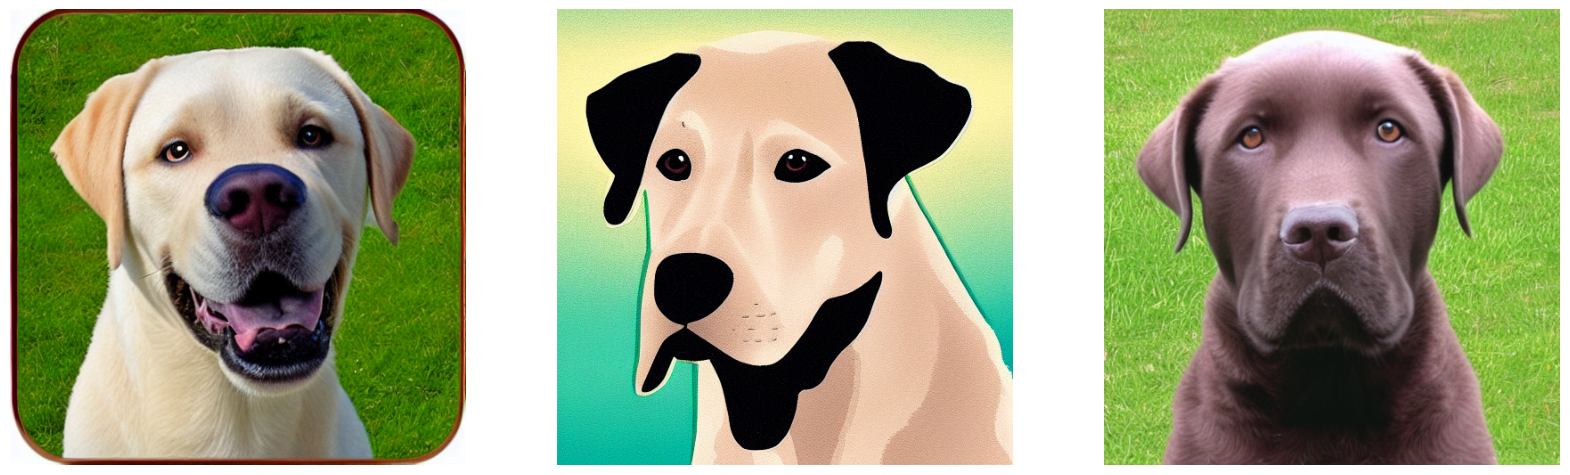

In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

plot_images(images)